In [60]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt

In [61]:
bt = pd.read_excel('../../data/processed/Biorreactor_Total.xlsx')

In [62]:
bt.describe()

,Agitation_PV,Air_Sparge_PV,Biocontainer_Pressure_PV,DO_1_PV,DO_2_PV,Gas_Overlay_PV,Load_Cell_Net_PV,pH_1_PV,pH_2_PV,PUMP_1_PV,PUMP_1_TOTAL,PUMP_2_PV,PUMP_2_TOTAL,Single_Use_DO_PV,Single_Use_pH_PV,Temperatura_PV,Num_Biorreactor
count,431877.000000,431877.000000,431890.000000,384002.000000,245346.000000,431879.000000,431888.000000,426758.000000,429724.000000,431878.000000,431885.000000,431878.000000,431884.000000,431880.000000,431877.000000,431881.000000,471717.000000
mean,22.264953,67.826063,231.580387,460.671929,0.762953,4.761391,398.106171,-1.429023,-24.918618,82.530459,40.102418,0.239615,2146.337329,797.813822,543.930108,18.526823,13973.555556
std,29.388784,220.130778,273.785910,1750.364447,5.539170,9.910544,667.906720,142.288434,92.918234,354.489916,138.601327,1.191678,3285.685085,2630.598721,381.346614,14.732128,718.276646
min,0.000000,-794.335986,-17.678558,-0.281366,-0.007697,0.000000,-84.400000,-16705.317188,-389.260962,-22.400000,0.000000,0.000000,0.000000,-14.840857,-794.367969,-0.400000,13169.000000
25%,0.000000,0.000000,-0.601849,0.000000,0.000000,0.000000,-6.000000,1.512431,-0.255274,0.000000,4.960000,0.000000,0.000000,480.000000,5.895996,12.366531,13171.000000
50%,6.144000,0.000000,2.271934,0.000000,0.000000,3.999763,0.000000,1.707277,-0.011332,0.000000,14.880000,0.000000,23.901222,741.763574,799.912012,16.359578,14614.000000
75%,29.656006,0.000000,480.000000,0.000000,0.000000,4.000171,170.640002,5.872530,2.509231,0.000000,40.800000,0.000000,4386.676172,799.991992,800.039990,23.992437,14616.000000
max,84.000000,805.695996,815.403125,12268.625000,89.740161,157.079858,1732.400000,2049.615234,178.781299,1711.449056,8199.600000,80.000000,22260.512500,32921.481250,805.952002,81.073239,14618.000000


Rare values taking in consideration the mean of data, max values distancing from mean. Also the std for some variables indicates data value is spreaded widely (e.g. Air_Sparge_PV)

In [63]:
bt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 471717 entries, 0 to 471716
Data columns (total 18 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   DateTime                  471717 non-null  object 
 1   Agitation_PV              431877 non-null  float64
 2   Air_Sparge_PV             431877 non-null  float64
 3   Biocontainer_Pressure_PV  431890 non-null  float64
 4   DO_1_PV                   384002 non-null  float64
 5   DO_2_PV                   245346 non-null  float64
 6   Gas_Overlay_PV            431879 non-null  float64
 7   Load_Cell_Net_PV          431888 non-null  float64
 8   pH_1_PV                   426758 non-null  float64
 9   pH_2_PV                   429724 non-null  float64
 10  PUMP_1_PV                 431878 non-null  float64
 11  PUMP_1_TOTAL              431885 non-null  float64
 12  PUMP_2_PV                 431878 non-null  float64
 13  PUMP_2_TOTAL              431884 non-null  f

Type for column biorreactor is wrong. Should be a string. Let's correct it.

In [64]:
#Type num_biorreactor to string
bt['Num_Biorreactor'] = bt['Num_Biorreactor'].astype(str)

In [65]:
bt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 471717 entries, 0 to 471716
Data columns (total 18 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   DateTime                  471717 non-null  object 
 1   Agitation_PV              431877 non-null  float64
 2   Air_Sparge_PV             431877 non-null  float64
 3   Biocontainer_Pressure_PV  431890 non-null  float64
 4   DO_1_PV                   384002 non-null  float64
 5   DO_2_PV                   245346 non-null  float64
 6   Gas_Overlay_PV            431879 non-null  float64
 7   Load_Cell_Net_PV          431888 non-null  float64
 8   pH_1_PV                   426758 non-null  float64
 9   pH_2_PV                   429724 non-null  float64
 10  PUMP_1_PV                 431878 non-null  float64
 11  PUMP_1_TOTAL              431885 non-null  float64
 12  PUMP_2_PV                 431878 non-null  float64
 13  PUMP_2_TOTAL              431884 non-null  f

In [66]:
bt.head()

,DateTime,Agitation_PV,Air_Sparge_PV,Biocontainer_Pressure_PV,DO_1_PV,DO_2_PV,Gas_Overlay_PV,Load_Cell_Net_PV,pH_1_PV,pH_2_PV,PUMP_1_PV,PUMP_1_TOTAL,PUMP_2_PV,PUMP_2_TOTAL,Single_Use_DO_PV,Single_Use_pH_PV,Temperatura_PV,Num_Biorreactor
0,2023-03-15 00:00:00.000,80.0,0.0,0.572660,0.0,-0.00553,4.000087,1576.8,-0.156925,5.888288,0.0,14.88,0.0,191.200293,799.991992,799.967969,30.216161,14614
1,2023-03-15 00:15:00.000,80.0,0.0,0.491942,0.0,-0.00553,4.000084,1576.8,-0.156925,5.896104,0.0,14.88,0.0,191.200293,799.991992,799.967969,30.135999,14614
2,2023-03-15 00:30:00.000,80.0,0.0,0.552688,0.0,-0.00553,4.000161,1576.8,-0.156925,5.896104,0.0,14.88,0.0,191.200293,799.991992,799.967969,29.823988,14614
3,2023-03-15 00:45:00.000,80.0,0.0,0.613318,0.0,-0.00553,4.000088,1576.8,-0.156925,5.896104,0.0,14.88,0.0,191.200293,799.991992,799.967969,29.408039,14614
4,2023-03-15 01:00:00.000,80.0,0.0,0.552421,0.0,-0.00553,3.999864,1577.2,-0.156925,5.904210,0.0,14.88,0.0,191.200293,799.991992,799.967969,29.191720,14614


In [67]:
#Duplicated rows
bt[bt.duplicated()]

,DateTime,Agitation_PV,Air_Sparge_PV,Biocontainer_Pressure_PV,DO_1_PV,DO_2_PV,Gas_Overlay_PV,Load_Cell_Net_PV,pH_1_PV,pH_2_PV,PUMP_1_PV,PUMP_1_TOTAL,PUMP_2_PV,PUMP_2_TOTAL,Single_Use_DO_PV,Single_Use_pH_PV,Temperatura_PV,Num_Biorreactor


No duplicated rows, good start

In [68]:
bt.isnull().sum()

DateTime                         0
Agitation_PV                 39840
Air_Sparge_PV                39840
Biocontainer_Pressure_PV     39827
DO_1_PV                      87715
DO_2_PV                     226371
Gas_Overlay_PV               39838
Load_Cell_Net_PV             39829
pH_1_PV                      44959
pH_2_PV                      41993
PUMP_1_PV                    39839
PUMP_1_TOTAL                 39832
PUMP_2_PV                    39839
PUMP_2_TOTAL                 39833
Single_Use_DO_PV             39837
Single_Use_pH_PV             39840
Temperatura_PV               39836
Num_Biorreactor                  0
dtype: int64

Interesting number of Null or NaN values. Almost every variable shares similar number, except DO_1 and DO_2, with 80k values and 226k values. Almost half of the values in column DO_2 are Null values...

In [69]:
(bt == 0).sum()

DateTime                         0
Agitation_PV                212983
Air_Sparge_PV               364359
Biocontainer_Pressure_PV      2587
DO_1_PV                     280302
DO_2_PV                     185717
Gas_Overlay_PV              174461
Load_Cell_Net_PV             70934
pH_1_PV                        174
pH_2_PV                        276
PUMP_1_PV                   385309
PUMP_1_TOTAL                 60410
PUMP_2_PV                   402514
PUMP_2_TOTAL                176605
Single_Use_DO_PV               136
Single_Use_pH_PV             44084
Temperatura_PV               25125
Num_Biorreactor                  0
dtype: int64

Unequal distribution of ranges for "0" value. Can not exactly interpret if these are value errors or else, as we do not have a codebook for the explanation of the variables or their value range. Also we do not know how a Biorreactor functions, so we can not comprehend what do these columns mean (only partially or based around instinct).


## It's plotting time

Also, let's analyze each variable per separated

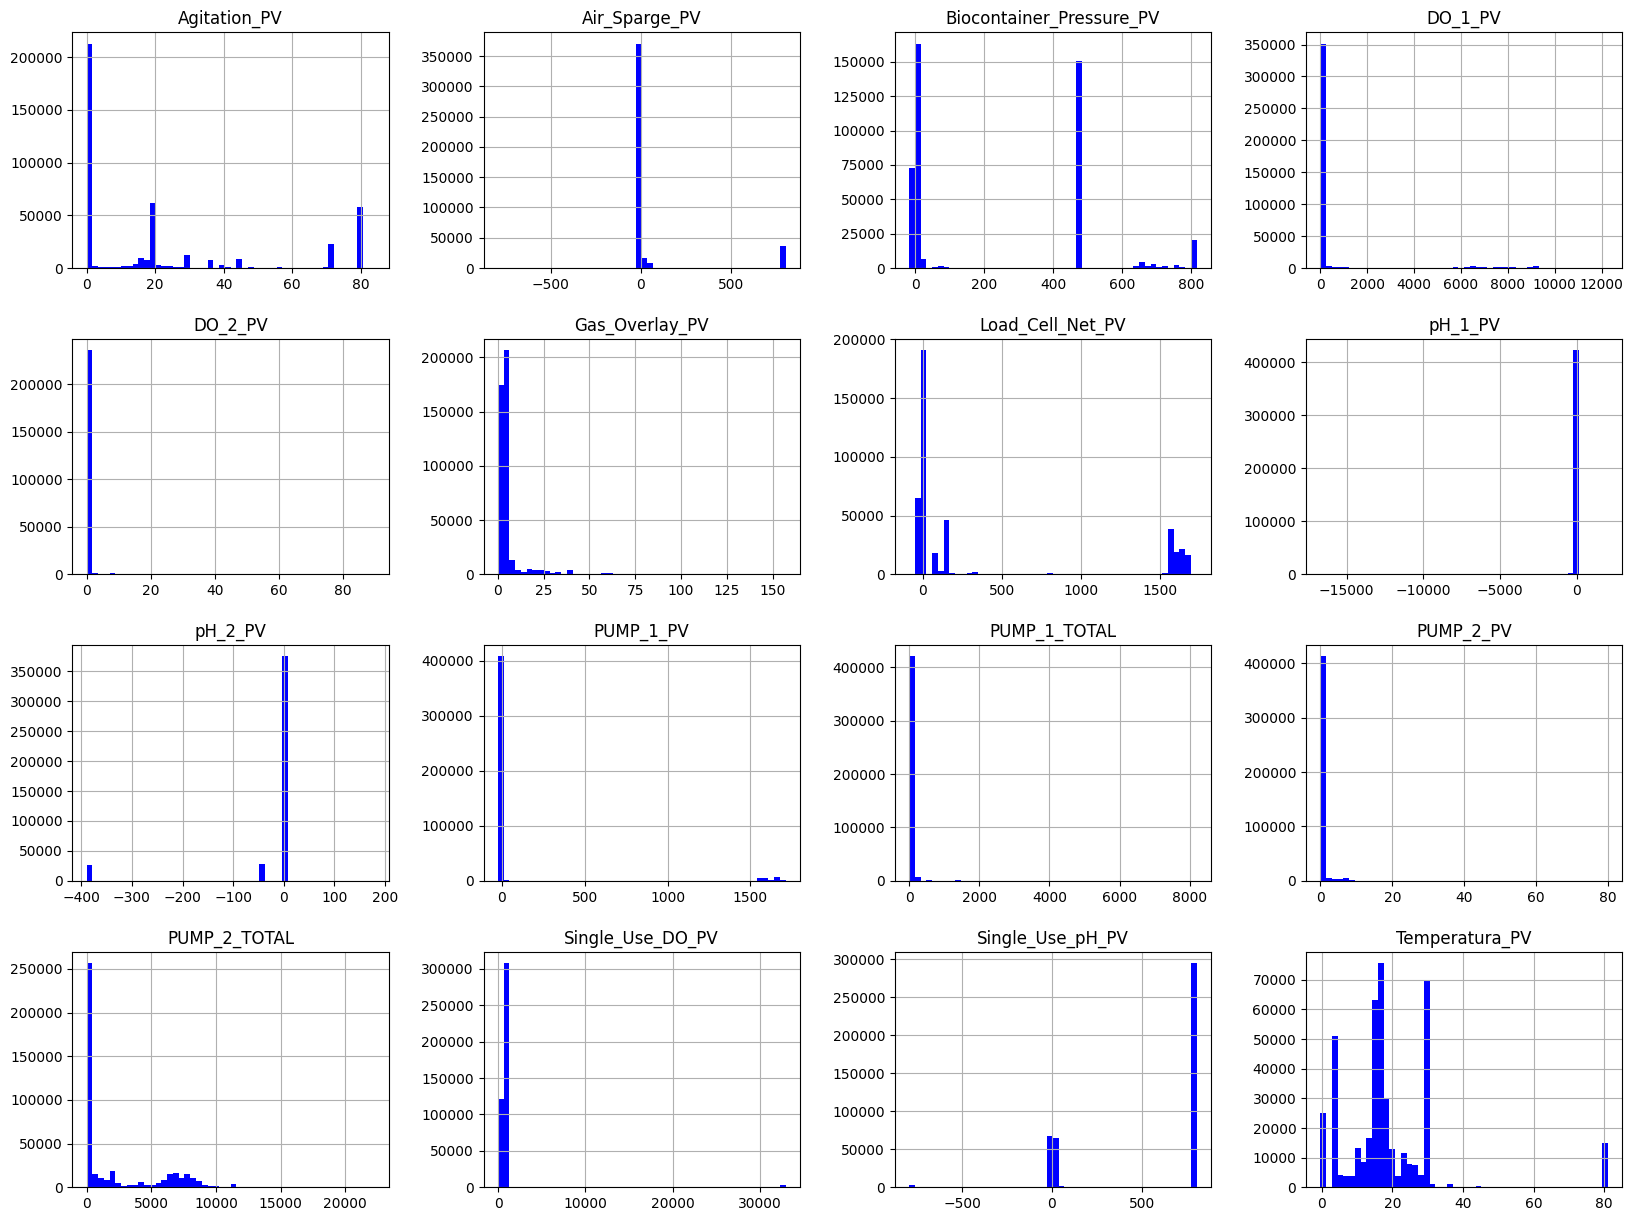

In [70]:
#Histogram for all columns
bt.hist(bins=50, figsize=(20,15), color='b')
plt.show()


From histograms of variables we can see that the dispersion for some variables is high, for example pressure. Also, visually it can be seen that there are values that can't be right, by definition of the variable. pH is a index which can range from 0 to 14, but there are values outside that range. Let's see those rows.

In [71]:
#Rows where pH_2_PV is less than 0 or greater than 14, only show column
bt[(bt['pH_2_PV'] < 0) | (bt['pH_2_PV'] > 14)]['pH_2_PV'].head()




3580   -0.255274
3581   -0.255274
3582   -0.255274
3583   -0.255274
3584   -0.255274
Name: pH_2_PV, dtype: float64

In [72]:
(bt['pH_2_PV'] < 0).sum() + (bt['pH_2_PV'] > 14).sum()

np.int64(215065)

-389.26? Have they created the perfect acid? What happens if they drop it from the container? It tears though the soil up to the core of the Earth?

In total, half of the column for pH_2_PV has wrong data. We can extrapolate values close to the edges to it, but what about the extremes? Let's repeat for columns pH_1_PV and Single_Use_pH_PV

In [73]:
#Rows where pH_2_PV is less than 0 or greater than 14, only show column
bt[(bt['pH_1_PV'] < 0) | (bt['pH_1_PV'] > 14)]['pH_1_PV'].head()

0   -0.156925
1   -0.156925
2   -0.156925
3   -0.156925
4   -0.156925
Name: pH_1_PV, dtype: float64

In [74]:
(bt['pH_1_PV'] < 0).sum() + (bt['pH_1_PV'] > 14).sum()

np.int64(50965)

In [75]:
#Rows where pH_2_PV is less than 0 or greater than 14, only show column
bt[(bt['Single_Use_pH_PV'] < 0) | (bt['Single_Use_pH_PV'] > 14)]['Single_Use_pH_PV'].head()

0    799.967969
1    799.967969
2    799.967969
3    799.967969
4    799.967969
Name: Single_Use_pH_PV, dtype: float64

800, the perfect base.

In [76]:
(bt['Single_Use_pH_PV'] < 0).sum() + (bt['Single_Use_pH_PV'] > 14).sum()

np.int64(302145)

Let's now see the resume per each variable

In [77]:
print(bt.groupby('Num_Biorreactor')['Agitation_PV'].describe())

                   count       mean        std       min        25%  \
Num_Biorreactor                                                       
13169            47939.0  22.050232  31.468260  0.000000   0.000000   
13170            47952.0  29.692431  34.858793  0.000000   0.000000   
13171            47755.0  17.658302  25.926322  0.000000   0.000000   
13172            48086.0  21.470704  27.278393  0.000000   0.000000   
14614            47970.0  27.900242  34.386795  0.000000   0.000000   
14615            48060.0  19.022394   7.666435  2.879999  14.935999   
14616            48054.0  27.403867  34.856413  0.000000   0.000000   
14617            47967.0  13.849633  26.725745  0.000000   0.000000   
14618            48094.0  21.319701  27.653088  0.000000   0.000000   

                       50%        75%       max  
Num_Biorreactor                                  
13169             0.000000  36.000000  80.00000  
13170            20.000000  80.000000  84.00000  
13171             

In [78]:
bt.columns

Index(['DateTime', 'Agitation_PV', 'Air_Sparge_PV', 'Biocontainer_Pressure_PV',
       'DO_1_PV', 'DO_2_PV', 'Gas_Overlay_PV', 'Load_Cell_Net_PV', 'pH_1_PV',
       'pH_2_PV', 'PUMP_1_PV', 'PUMP_1_TOTAL', 'PUMP_2_PV', 'PUMP_2_TOTAL',
       'Single_Use_DO_PV', 'Single_Use_pH_PV', 'Temperatura_PV',
       'Num_Biorreactor'],
      dtype='object')

In [79]:
print("Descriptive statistics for Agitation_PV:")
print(bt.groupby('Num_Biorreactor')['Agitation_PV'].describe())
print("\n")

Descriptive statistics for Agitation_PV:
                   count       mean        std       min        25%  \
Num_Biorreactor                                                       
13169            47939.0  22.050232  31.468260  0.000000   0.000000   
13170            47952.0  29.692431  34.858793  0.000000   0.000000   
13171            47755.0  17.658302  25.926322  0.000000   0.000000   
13172            48086.0  21.470704  27.278393  0.000000   0.000000   
14614            47970.0  27.900242  34.386795  0.000000   0.000000   
14615            48060.0  19.022394   7.666435  2.879999  14.935999   
14616            48054.0  27.403867  34.856413  0.000000   0.000000   
14617            47967.0  13.849633  26.725745  0.000000   0.000000   
14618            48094.0  21.319701  27.653088  0.000000   0.000000   

                       50%        75%       max  
Num_Biorreactor                                  
13169             0.000000  36.000000  80.00000  
13170            20.000000 

In [80]:
print("Descriptive statistics for Air_Sparge_PV:")
print(bt.groupby('Num_Biorreactor')['Air_Sparge_PV'].describe())
print("\n")

Descriptive statistics for Air_Sparge_PV:
                   count        mean         std         min    25%  \
Num_Biorreactor                                                       
13169            47939.0    2.601502   11.546708    0.000000  0.000   
13170            47952.0    2.900448   12.290201    0.000000  0.000   
13171            47755.0    0.203269    1.598309    0.000000  0.000   
13172            48086.0    0.161079    1.392737    0.000000  0.000   
14614            47970.0    2.627570   11.698932    0.000000  0.000   
14615            48060.0  596.475058  346.869553 -794.335986  5.984   
14616            48054.0    2.698571   11.930932    0.000000  0.000   
14617            47967.0    1.675816    9.417125    0.000000  0.000   
14618            48094.0    0.178219    1.462651    0.000000  0.000   

                        50%         75%         max  
Num_Biorreactor                                      
13169              0.000000    0.000000  160.037955  
13170         

In [81]:
print("Descriptive statistics for Biocontainer_Pressure_PV:")
print(bt.groupby('Num_Biorreactor')['Biocontainer_Pressure_PV'].describe())
print("\n")

Descriptive statistics for Biocontainer_Pressure_PV:
                   count        mean         std        min         25%  \
Num_Biorreactor                                                           
13169            47945.0  208.037243  238.238807 -14.382141   -0.804401   
13170            47953.0  139.790907  218.456331  -5.868543   -1.136401   
13171            47757.0  207.211399  237.890199 -17.466855   -0.445921   
13172            48087.0  167.961288  229.240359 -12.795142   -1.006946   
14614            47971.0  128.601994  212.843545 -14.839222   -0.804401   
14615            48060.0  577.740845  314.921425   0.000000  640.967871   
14616            48054.0  166.480441  228.538402 -17.678558   -0.534957   
14617            47967.0  307.409516  230.864840 -13.325246   -0.144588   
14618            48096.0  180.597354  232.652878  -6.820026   -0.824652   

                        50%         75%         max  
Num_Biorreactor                                      
13169        

In [82]:
print("Descriptive statistics for DO_1_PV:")
print(bt.groupby('Num_Biorreactor')['DO_1_PV'].describe())
print("\n")


Descriptive statistics for DO_1_PV:
                   count         mean          std       min  25%  \
Num_Biorreactor                                                     
13169            47941.0     5.661660    23.656879  0.000000  0.0   
13170            47952.0     7.265186    16.070681  0.000000  0.0   
13171            46785.0     3.106710    11.683093  0.000000  0.0   
13172             1178.0     1.881705     7.540776  0.000000  0.0   
14614            47970.0     6.195418    14.491800  0.000000  0.0   
14615            48061.0  3647.979931  3586.865184  0.000000  0.0   
14616            48054.0     5.030329    11.980638  0.000000  0.0   
14617            47967.0     2.791717     9.068869 -0.281366  0.0   
14618            48094.0     2.769094    10.635949  0.000000  0.0   

                         50%          75%           max  
Num_Biorreactor                                          
13169               0.000000     0.000000   4262.800000  
13170               0.000000  

In [83]:
print("Descriptive statistics for DO_2_PV:")
print(bt.groupby('Num_Biorreactor')['DO_2_PV'].describe())
print("\n")

Descriptive statistics for DO_2_PV:
                   count      mean        std       min       25%       50%  \
Num_Biorreactor                                                               
13169             1395.0  1.071074   5.668946 -0.007697 -0.007697 -0.007697   
13170             1624.0  0.000000   0.000000  0.000000  0.000000  0.000000   
13171            47755.0  0.052313   2.160249  0.000000  0.000000  0.000000   
13172            48086.0  3.295799  11.825040  0.000000  0.000000  0.000000   
14614            47971.0 -0.005427   0.000733 -0.005530 -0.005530 -0.005530   
14615            48060.0  0.518288   1.694473  0.000000  0.000000  0.000000   
14616            48054.0  0.001346   0.294981  0.000000  0.000000  0.000000   
14617             1150.0  0.000000   0.000000  0.000000  0.000000  0.000000   
14618             1251.0  0.000000   0.000000  0.000000  0.000000  0.000000   

                     75%        max  
Num_Biorreactor                      
13169            0

In [84]:
print("Descriptive statistics for Gas_Overlay_PV:")
print(bt.groupby('Num_Biorreactor')['Gas_Overlay_PV'].describe())
print("\n")

Descriptive statistics for Gas_Overlay_PV:
                   count       mean        std  min       25%        50%  \
Num_Biorreactor                                                            
13169            47939.0   2.388680   2.524671  0.0  0.000000   3.999587   
13170            47952.0   2.673700   2.130250  0.0  0.000000   3.999563   
13171            47755.0   1.976907   2.197306  0.0  0.000000   0.000000   
13172            48086.0   2.434127   1.964264  0.0  0.000000   3.999765   
14614            47970.0   3.179065   2.458059  0.0  0.000000   3.999900   
14615            48061.0  24.139296  20.485735  0.0  9.239999  21.119997   
14616            48054.0   2.437565   2.029030  0.0  0.000000   3.999731   
14617            47967.0   1.411087   2.115722  0.0  0.000000   0.000000   
14618            48095.0   2.176757   2.099013  0.0  0.000000   3.999652   

                       75%         max  
Num_Biorreactor                         
13169             4.000068   20.592549

In [85]:
print("Descriptive statistics for Load_Cell_Net_PV:")
print(bt.groupby('Num_Biorreactor')['Load_Cell_Net_PV'].describe())
print("\n")

Descriptive statistics for Load_Cell_Net_PV:
                   count        mean         std        min    25%  \
Num_Biorreactor                                                      
13169            47942.0  664.331123  786.575572 -24.800000 -18.40   
13170            47953.0  829.763131  801.459025 -84.400000 -17.60   
13171            47757.0   54.850920   73.671666  -8.604112  -6.48   
13172            48087.0   70.357556   77.132751  -8.479657  -6.16   
14614            47972.0  723.199197  780.332766 -22.800000  -1.20   
14615            48060.0    0.003039    0.384737   0.000000   0.00   
14616            48054.0  737.509252  801.436624 -27.200000 -16.80   
14617            47967.0  440.529907  714.418416 -26.800000  -1.20   
14618            48096.0   63.016860   74.350430  -9.040000  -6.24   

                         50%          75%          max  
Num_Biorreactor                                         
13169               0.400000  1590.400000  1700.826514  
13170        

In [86]:
print("Descriptive statistics for pH_1_PV:")
print(bt.groupby('Num_Biorreactor')['pH_1_PV'].describe())
print("\n")

Descriptive statistics for pH_1_PV:
                   count       mean         std           min       25%  \
Num_Biorreactor                                                           
13169            47940.0   3.093624    2.441836     -0.033251  1.563560   
13170            47305.0   3.834368    2.088075     -1.499362  1.583819   
13171            43276.0   3.092163    2.153384     -0.328578  1.457041   
13172            48087.0  -0.557152    4.195475     -4.779090 -4.686229   
14614            47972.0   3.078209    2.187794     -0.156925  1.516280   
14615            48061.0   2.013196    3.010385     -0.264446 -0.234763   
14616            48054.0   1.808313  400.586570 -16705.317188  1.579833   
14617            47967.0   2.808930    1.793312     -0.098878  1.698633   
14618            48096.0 -31.450050  135.055240   -527.387158  4.539851   

                      50%       75%          max  
Num_Biorreactor                                   
13169            1.665760  5.639794 

In [87]:
print("Descriptive statistics for pH_2_PV:")
print(bt.groupby('Num_Biorreactor')['pH_2_PV'].describe())
print("\n")

Descriptive statistics for pH_2_PV:
                   count        mean         std         min         25%  \
Num_Biorreactor                                                            
13169            47940.0   -0.020121    0.088208   -0.347235   -0.011332   
13170            47953.0  -23.006696   18.846901  -38.210712  -38.210712   
13171            45594.0    3.072010    0.605580   -0.016351    3.200000   
13172            48087.0    1.227808    2.592923   -0.851783   -0.851783   
14614            47972.0    0.000656    1.018567   -0.255274   -0.255274   
14615            48061.0    2.557953    1.831666    0.000000    1.300273   
14616            48054.0 -208.914982  195.424102 -389.260962 -389.260962   
14617            47967.0   -0.147510    1.577168   -1.969051   -1.969051   
14618            48096.0    2.500757    2.314162   -0.342431    0.598121   

                        50%       75%         max  
Num_Biorreactor                                    
13169             -0.01

In [88]:
print("Descriptive statistics for PUMP_1_PV:")
print(bt.groupby('Num_Biorreactor')['PUMP_1_PV'].describe())
print("\n")

Descriptive statistics for PUMP_1_PV:
                   count        mean         std   min   25%  50%     75%  \
Num_Biorreactor                                                             
13169            47939.0    0.009560    0.591963   0.0   0.0  0.0     0.0   
13170            47952.0    0.011006    0.715615   0.0   0.0  0.0     0.0   
13171            47755.0    0.002065    0.214428   0.0   0.0  0.0     0.0   
13172            48086.0    0.001996    0.309558   0.0   0.0  0.0     0.0   
14614            47970.0    0.004003    0.438301   0.0   0.0  0.0     0.0   
14615            48061.0  741.588541  800.297193 -22.4 -16.4  2.8  1592.0   
14616            48054.0    0.002997    0.379252   0.0   0.0  0.0     0.0   
14617            47967.0    0.000797    0.174499   0.0   0.0  0.0     0.0   
14618            48094.0    0.000998    0.218875   0.0   0.0  0.0     0.0   

                         max  
Num_Biorreactor               
13169              80.000000  
13170              48

In [89]:
print("Descriptive statistics for PUMP_1_TOTAL:")
print(bt.groupby('Num_Biorreactor')['PUMP_1_TOTAL'].describe())
print("\n")


Descriptive statistics for PUMP_1_TOTAL:
                   count       mean         std  min        25%        50%  \
Num_Biorreactor                                                              
13169            47940.0  79.654032  303.577819  0.0  12.400000  24.800002   
13170            47953.0  54.089623  227.285274  0.0   9.600000  18.000000   
13171            47756.0  36.590068  101.605139  0.0   7.439999   9.920000   
13172            48087.0  11.264756   12.879822  0.0   4.960000   7.439999   
14614            47972.0  45.618193   69.663801  0.0  14.880000  32.239999   
14615            48060.0   2.771288    2.139259  0.0   0.000000   3.999800   
14616            48054.0  48.465288   60.065844  0.0  12.400000  34.719998   
14617            47967.0  64.224683   66.363623  0.0  24.800002  49.599991   
14618            48096.0  18.441754   27.211317  0.0   7.439999  12.400000   

                       75%          max  
Num_Biorreactor                          
13169           

In [90]:
print("Descriptive statistics for PUMP_2_PV:")
print(bt.groupby('Num_Biorreactor')['PUMP_2_PV'].describe())
print("\n")

Descriptive statistics for PUMP_2_PV:


                   count      mean       std  min  25%  50%  75%        max
Num_Biorreactor                                                            
13169            47940.0  0.422480  1.523038  0.0  0.0  0.0  0.0  46.867441
13170            47952.0  0.533255  1.731224  0.0  0.0  0.0  0.0  48.000000
13171            47755.0  0.025990  0.404671  0.0  0.0  0.0  0.0  48.000000
13172            48086.0  0.017902  0.494674  0.0  0.0  0.0  0.0  48.000000
14614            47970.0  0.431322  1.567480  0.0  0.0  0.0  0.0  80.000000
14615            48060.0  0.000000  0.000000  0.0  0.0  0.0  0.0   0.000000
14616            48054.0  0.459112  1.595708  0.0  0.0  0.0  0.0  48.000000
14617            47967.0  0.252685  1.201884  0.0  0.0  0.0  0.0  48.000000
14618            48094.0  0.014245  0.449777  0.0  0.0  0.0  0.0  72.000000




In [91]:
print("Descriptive statistics for PUMP_2_TOTAL:")
print(bt.groupby('Num_Biorreactor')['PUMP_2_TOTAL'].describe())
print("\n")

Descriptive statistics for PUMP_2_TOTAL:
                   count         mean          std  min          25%  \
Num_Biorreactor                                                        
13169            47940.0  3636.428698  3541.153566  0.0     0.000000   
13170            47953.0  4111.451776  4528.482384  0.0     0.000000   
13171            47756.0   471.754425  1142.744120  0.0     0.000000   
13172            48087.0    18.354265    78.606721  0.0     0.000000   
14614            47972.0  3540.257883  3448.011286  0.0     0.000000   
14615            48060.0     5.813831    12.754246  0.0     0.000000   
14616            48054.0  3825.414684  3443.966762  0.0   150.563818   
14617            47967.0  3686.075363  3072.608697  0.0  1653.925000   
14618            48095.0    27.468309    88.202283  0.0     0.000000   

                         50%          75%           max  
Num_Biorreactor                                          
13169            1713.515223  7517.381250  22260.5

In [92]:
print("Descriptive statistics for Single_Use_DO_PV:")
print(bt.groupby('Num_Biorreactor')['Single_Use_DO_PV'].describe())
print("\n")

Descriptive statistics for Single_Use_DO_PV:
                   count         mean          std        min         25%  \
Num_Biorreactor                                                             
13169            47941.0   587.299919   296.335998   0.000000  655.086768   
13170            47952.0   586.632232   308.615392   0.000000  663.893799   
13171            47755.0   674.701970   261.325842   0.000000  712.941797   
13172            48086.0   690.827001   254.611412   0.000000  736.844434   
14614            47970.0   611.919448   300.299917   0.000000  698.499951   
14615            48061.0   148.239273   221.862870 -14.840857   -0.423723   
14616            48054.0  2505.258850  7622.647642   0.000000  637.647070   
14617            47967.0   665.568743   254.877459   0.000000  731.655420   
14618            48094.0   707.844035   239.384771   0.000000  735.895508   

                        50%         75%           max  
Num_Biorreactor                                    

In [93]:
print("Descriptive statistics for Single_Use_pH_PV:")
print(bt.groupby('Num_Biorreactor')['Single_Use_pH_PV'].describe())
print("\n")

Descriptive statistics for Single_Use_pH_PV:
                   count        mean         std         min         25%  \
Num_Biorreactor                                                            
13169            47939.0  589.883287  351.098117 -788.247998    6.087988   
13170            47952.0  623.764271  330.018406   -0.400000  799.687988   
13171            47755.0  628.815058  345.260436 -790.128027  799.912012   
13172            48086.0  677.109585  297.374994 -794.047998  799.935986   
14614            47970.0  556.635964  376.543569 -794.223975    5.912012   
14615            48060.0    3.202747   12.943404    0.000000    0.000000   
14616            48054.0  616.261361  336.037650 -794.271973  799.687988   
14617            47967.0  492.032695  434.237034 -794.367969    5.895996   
14618            48094.0  708.243909  254.144807    0.096000  799.960010   

                        50%         75%         max  
Num_Biorreactor                                      
13169     

In [94]:
print("Descriptive statistics for Temperatura_PV:")
print(bt.groupby('Num_Biorreactor')['Temperatura_PV'].describe())
print("\n")

Descriptive statistics for Temperatura_PV:


                   count       mean        std       min        25%  \
Num_Biorreactor                                                       
13169            47940.0  17.538095   8.013500  0.134221  14.279996   
13170            47952.0  17.415170   9.153360 -0.400000  12.856006   
13171            47755.0  17.078610   7.762257  0.157253  13.499294   
13172            48087.0  16.279289   8.635179  0.000000  10.456031   
14614            47971.0  18.024732   8.206971  3.047998  14.704004   
14615            48060.0  29.496487  35.796978  0.000000   0.000000   
14616            48054.0  17.610518   8.591194  3.015997  14.070899   
14617            47967.0  16.674519   6.442489  3.032001  14.494048   
14618            48095.0  16.607862   8.151115 -0.247998  13.656006   

                       50%        75%        max  
Num_Biorreactor                                   
13169            16.174336  23.367996  80.831995  
13170            16.112000  29.551464  81.073239  
13171         

In [95]:
# Convert to datetime
bt['DateTime'] = pd.to_datetime(bt['DateTime'])

In [96]:
# Do all groups follow the +15 minutes rule? (sort first before diff)
weird_minutes = bt.groupby('Num_Biorreactor')['DateTime'].apply(lambda x: x.sort_values().diff().dt.total_seconds())
weird_minutes = weird_minutes[weird_minutes > 900]
weird_minutes

Num_Biorreactor        
13169            263129    4500.0
                 298745    4500.0
13170            315542    4500.0
                 351158    4500.0
13171            53477     4500.0
                 89093     4500.0
13172            158303    4500.0
                 193919    4500.0
14614            1064      4500.0
                 36680     4500.0
14615            105890    4500.0
                 141506    4500.0
14616            420368    4500.0
                 455984    4500.0
14617            367955    4500.0
                 403571    4500.0
14618            210716    4500.0
                 246332    4500.0
Name: DateTime, dtype: float64

In [97]:
# Loc weird_minutes by second level index
ind = weird_minutes.index.get_level_values(1)
bt.loc[ind]

,DateTime,Agitation_PV,Air_Sparge_PV,Biocontainer_Pressure_PV,DO_1_PV,DO_2_PV,Gas_Overlay_PV,Load_Cell_Net_PV,pH_1_PV,pH_2_PV,PUMP_1_PV,PUMP_1_TOTAL,PUMP_2_PV,PUMP_2_TOTAL,Single_Use_DO_PV,Single_Use_pH_PV,Temperatura_PV,Num_Biorreactor
263129,2023-03-26 03:00:00,0.000000,0.000000,480.000000,0.000000,NaN,0.000000,-19.600000,1.563560,-0.011332,0.0,27.280002,0.0,1486.330176,655.892432,799.623975,17.726984,13169
298745,2024-03-31 03:00:00,0.000000,0.000000,480.000000,0.000000,NaN,0.000000,-18.400000,1.589182,-0.011332,0.0,39.679996,0.0,7637.635938,693.113818,799.847998,15.923848,13169
315542,2023-03-26 03:00:00,0.000000,0.000000,480.000000,0.000000,NaN,0.000000,-16.000000,1.623706,-0.138586,0.0,30.000000,0.0,8707.276563,686.276074,799.839990,16.623999,13170
351158,2024-03-31 03:00:00,0.000000,0.000000,480.000000,0.000000,0.00000,0.000000,-17.200000,1.572478,-38.210712,0.0,34.800000,0.0,7083.582031,715.940625,799.895996,15.542689,13170
53477,2023-03-26 03:00:00,32.000000,0.000000,1.626208,0.000000,0.00000,3.999720,98.400006,5.944230,3.200000,0.0,96.719971,0.0,75.446790,799.991992,800.519971,29.735715,13171
89093,2024-03-31 03:00:00,0.000000,0.000000,480.000000,0.000000,0.00000,0.000000,-5.600000,1.383357,3.200000,0.0,12.400000,0.0,57.759473,723.647168,799.991992,16.568927,13171
158303,2023-03-26 03:00:00,72.000000,0.000000,-1.270258,NaN,0.00000,4.000370,154.640002,1.507032,-0.851783,0.0,0.000000,0.0,0.000000,799.991992,800.391992,3.223999,13172
193919,2024-03-31 03:00:00,0.000000,0.000000,480.000000,NaN,0.00000,0.000000,-6.960000,-4.686229,1.298498,0.0,7.439999,0.0,2.766121,736.844434,800.208008,17.135999,13172
1064,2023-03-26 03:00:00,0.000000,0.000000,480.000000,0.000000,-0.00553,0.000000,-18.000000,-0.156925,1.350532,0.0,66.959973,0.0,8552.753906,684.221729,799.967969,17.112000,14614
36680,2024-03-31 03:00:00,0.000000,0.000000,480.000000,0.000000,-0.00553,0.000000,-17.600000,1.467677,-0.255274,0.0,32.239999,0.0,6269.859375,738.545020,799.943994,16.312000,14614


In [98]:
weird_minutes_oct = bt.groupby('Num_Biorreactor')['DateTime'].apply(lambda x: x.sort_values().diff().dt.total_seconds())
weird_minutes_oct = weird_minutes_oct[weird_minutes_oct < 900]
weird_minutes_oct

Num_Biorreactor        
13169            283961    0.0
                 283958    0.0
                 283963    0.0
                 283960    0.0
13170            336374    0.0
                 336371    0.0
                 336376    0.0
                 336373    0.0
13171            74309     0.0
                 74306     0.0
                 74311     0.0
                 74308     0.0
13172            179135    0.0
                 179132    0.0
                 179137    0.0
                 179134    0.0
14614            21896     0.0
                 21893     0.0
                 21898     0.0
                 21895     0.0
14615            126722    0.0
                 126719    0.0
                 126724    0.0
                 126721    0.0
14616            441200    0.0
                 441197    0.0
                 441202    0.0
                 441199    0.0
14617            388787    0.0
                 388784    0.0
                 388789    0.0
               

In [99]:
# Loc weird_minutes by second level index
ind = weird_minutes_oct.index.get_level_values(1)
bt.loc[ind]

,DateTime,Agitation_PV,Air_Sparge_PV,Biocontainer_Pressure_PV,DO_1_PV,DO_2_PV,Gas_Overlay_PV,Load_Cell_Net_PV,pH_1_PV,pH_2_PV,PUMP_1_PV,PUMP_1_TOTAL,PUMP_2_PV,PUMP_2_TOTAL,Single_Use_DO_PV,Single_Use_pH_PV,Temperatura_PV,Num_Biorreactor
283961,2023-10-29 02:00:00,0.000000,0.000000,480.000000,0.0,NaN,0.000000,-20.800000,1.433881,-0.011332,0.0,74.399982,0.0,6585.218750,660.495361,799.975977,8.983999,13169
283958,2023-10-29 02:15:00,0.000000,0.000000,480.000000,0.0,NaN,0.000000,-20.800000,1.433881,-0.011332,0.0,74.399982,0.0,6585.218750,660.495361,799.975977,8.888003,13169
283963,2023-10-29 02:30:00,0.000000,0.000000,480.000000,0.0,NaN,0.000000,-20.800000,1.433881,-0.011332,0.0,74.399982,0.0,6585.218750,660.495361,799.975977,8.988277,13169
283960,2023-10-29 02:45:00,0.000000,0.000000,480.000000,0.0,NaN,0.000000,-20.800000,1.488061,-0.011332,0.0,74.399982,0.0,5922.862026,660.495361,799.975977,8.903994,13169
336374,2023-10-29 02:00:00,20.000000,0.000000,-2.445026,0.0,NaN,3.999715,1574.000000,3.531377,-38.210712,0.0,13.200000,0.0,0.000000,766.275830,800.031982,4.791998,13170
336371,2023-10-29 02:15:00,20.000000,0.000000,-2.484169,0.0,NaN,4.000606,1574.000000,3.531377,-38.210712,0.0,13.200000,0.0,0.000000,766.275830,800.031982,4.735999,13170
336376,2023-10-29 02:30:00,20.000000,0.000000,-2.486954,0.0,NaN,3.999850,1574.000000,3.531377,-38.210712,0.0,13.200000,0.0,0.000000,766.275830,800.031982,4.823999,13170
336373,2023-10-29 02:45:00,20.000000,0.000000,-2.483061,0.0,NaN,4.000522,1574.000000,3.531377,-38.210712,0.0,13.200000,0.0,0.000000,766.275830,800.031982,4.791998,13170
74309,2023-10-29 02:00:00,0.000000,0.000000,480.000000,0.0,0.00000,0.000000,0.080000,3.223364,3.200000,0.0,512.534473,0.0,2426.916602,834.803223,800.087988,9.423999,13171
74306,2023-10-29 02:15:00,0.000000,0.000000,480.000000,0.0,0.00000,0.000000,0.080000,3.223364,3.200000,0.0,512.534473,0.0,2426.916602,834.803223,800.087988,9.280005,13171


In [100]:
# Are there dupe rows
bt.duplicated().sum()

np.int64(0)

In [101]:
bt[(bt['DateTime'] >= '2023-10-29 00:00:00') & (bt['DateTime'] < '2023-10-29 04:00:00')]

,DateTime,Agitation_PV,Air_Sparge_PV,Biocontainer_Pressure_PV,DO_1_PV,DO_2_PV,Gas_Overlay_PV,Load_Cell_Net_PV,pH_1_PV,pH_2_PV,PUMP_1_PV,PUMP_1_TOTAL,PUMP_2_PV,PUMP_2_TOTAL,Single_Use_DO_PV,Single_Use_pH_PV,Temperatura_PV,Num_Biorreactor
21884,2023-10-29 00:00:00,0.0,0.0,-3.830325,0.0,-0.00553,4.000035,-0.800000,1.728335,-0.255274,0.0,66.959985,0.0,6825.221875,799.991992,800.016016,10.047998,14614
21885,2023-10-29 00:15:00,0.0,0.0,-3.802081,0.0,-0.00553,4.000367,-0.800000,1.728335,-0.255274,0.0,66.959985,0.0,6825.221875,799.991992,800.016016,10.047998,14614
21886,2023-10-29 00:30:00,0.0,0.0,-3.843715,0.0,-0.00553,4.000248,-0.800000,1.728335,-0.255274,0.0,66.959985,0.0,6825.221875,799.991992,800.016016,10.023999,14614
21887,2023-10-29 00:45:00,0.0,0.0,-3.811757,0.0,-0.00553,3.999834,-0.800000,1.728335,-0.255274,0.0,66.959985,0.0,6825.221875,799.991992,800.016016,10.047998,14614
21888,2023-10-29 01:00:00,0.0,0.0,-3.841122,0.0,-0.00553,3.999736,-0.800000,1.728335,-0.255274,0.0,66.959985,0.0,6825.221875,799.991992,800.016016,10.000000,14614
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
441203,2023-10-29 02:45:00,0.0,0.0,480.000000,0.0,0.00000,0.000000,-17.200000,3.079762,-389.260962,0.0,0.000000,0.0,0.000000,723.058545,800.064014,9.647998,14616
441204,2023-10-29 03:00:00,0.0,0.0,480.000000,0.0,0.00000,0.000000,-17.200000,3.079762,-389.260962,0.0,0.000000,0.0,0.000000,723.058545,800.064014,9.712000,14616
441205,2023-10-29 03:15:00,0.0,0.0,480.000000,0.0,0.00000,0.000000,-17.600000,3.079762,-389.260962,0.0,0.000000,0.0,0.000000,723.058545,800.064014,9.719319,14616
441206,2023-10-29 03:30:00,0.0,0.0,480.000000,0.0,0.00000,0.000000,-17.200000,3.079762,-389.260962,0.0,0.000000,0.0,0.000000,723.058545,800.064014,9.720630,14616


Fix later, in rebuild, the datetimes

In [102]:
bt.columns

Index(['DateTime', 'Agitation_PV', 'Air_Sparge_PV', 'Biocontainer_Pressure_PV',
       'DO_1_PV', 'DO_2_PV', 'Gas_Overlay_PV', 'Load_Cell_Net_PV', 'pH_1_PV',
       'pH_2_PV', 'PUMP_1_PV', 'PUMP_1_TOTAL', 'PUMP_2_PV', 'PUMP_2_TOTAL',
       'Single_Use_DO_PV', 'Single_Use_pH_PV', 'Temperatura_PV',
       'Num_Biorreactor'],
      dtype='object')

In [103]:
bt.to_csv('../../data/processed/Biorreactor_Total.csv', index=False)